In [20]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



print("\n### Libraries Imported ###\n")


### Libraries Imported ###



In [21]:
# Load the training data
print("- Loading CSV Data -")
url_df = pd.read_csv('C:\\Users\\PREETI\\Desktop\\Malicious.csv')

test_url = url_df['URLs'][4]

print("\n### CSV Data Loaded ###\n")

- Loading CSV Data -

### CSV Data Loaded ###



In [22]:
# Let's see what our training data looks like
print(url_df)

                                                     URLs Class
0                         freebase.com/view/en/bob_sirois  good
1                          en.wikipedia.org/wiki/Joie_Lee  good
2                pipl.com/directory/people/Rejean/Beaudin  good
3       flickr.com/photos/teneyck/sets/72157610336209297/  good
4       ussoccer.com/News/Federation-Services/2009/06/...  good
...                                                   ...   ...
420459  ourorigins.org/genealogielistfirstname.aspx?an...  good
420460    simira.co.id/cifk/live.com/Account_Verified.htm   bad
420461  kstatesports.com/sports/w-baskbl/spec-rel/ksu-...  good
420462  vh1.com/video/living-colour/9128/cult-of-perso...  good
420463     absoluteastronomy.com/topics/SummerSlam_(1990)  good

[420464 rows x 2 columns]


In [23]:
# Perform Train/Test split
test_percentage = .2

train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']

print("\n### Split Complete ###\n")


### Split Complete ###



- Counting Splits -
Training Samples: 336371
Testing Samples: 84093


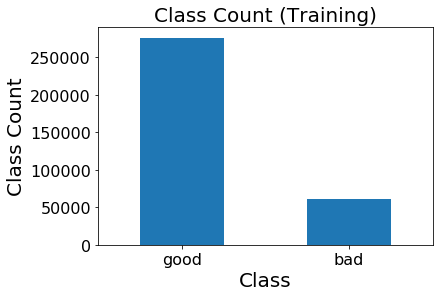

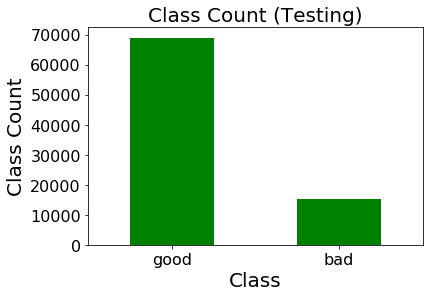

In [24]:
# Print counts of each class
print("- Counting Splits -")
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

In [25]:
# Define tokenizer
#   The purpose of a tokenizer is to separate the features from the raw data


def tokenizer(url):
  """Separates feature words from the raw data
  Keyword arguments:
    url ---- The full URL
    
  :Returns -- The tokenized words; returned as a list
  """
  
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)
  
  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')
      
      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")
      
      tokens += dot_split
      
  return tokens
    
print("\n### Tokenizer defined ###\n")


### Tokenizer defined ###



In [26]:
# Let's see how our tokenizer changes our URLs

print("\n- Full URL -\n")
print(test_url)









- Full URL -

ussoccer.com/News/Federation-Services/2009/06/University-Of-Miami-President-Donna-E-Shalala-Joins-Team-To-Bring-FIFA-World-Cup-To-United-States-In.aspx


In [27]:
# Tokenize test URL
print("\n- Tokenized Output -\n")
tokenized_url=tokenizer(test_url)



- Tokenized Output -



In [28]:
print(tokenized_url)

['ussoccer.com', 'News', 'Federation', 'Services', '2009', '06', 'University', 'Of', 'Miami', 'President', 'Donna', 'E', 'Shalala', 'Joins', 'Team', 'To', 'Bring', 'FIFA', 'World', 'Cup', 'To', 'United', 'States', 'In.aspx', 'ussoccer', 'In', 'aspx']


In [29]:
# Vectorizer the training inputs -- Takes about 30 seconds to complete
#   There are two types of vectors:
#     1. Count vectorizer
#     2. Term Frequency-Inverse Document Frequency (TF-IDF)

print("- Training Count Vectorizer -")

cVec=CountVectorizer(tokenizer=tokenizer)

count_x=cVec.fit_transform(train_df['URLs'])

print("- Training TF-IDF Vectorizer -")
tVec=TfidfVectorizer(tokenizer=tokenizer)
tfidf_X=tVec.fit_transform(train_df['URLs'])





print("\n### Vectorizing Complete ###\n")

- Training Count Vectorizer -
- Training TF-IDF Vectorizer -

### Vectorizing Complete ###



In [30]:
## Manually perform team count on test_url
for token in list(dict.fromkeys(tokenized_url)):
    print("{}-{}".format(tokenized_url.count(token),token))

1-ussoccer.com
1-News
1-Federation
1-Services
1-2009
1-06
1-University
1-Of
1-Miami
1-President
1-Donna
1-E
1-Shalala
1-Joins
1-Team
2-To
1-Bring
1-FIFA
1-World
1-Cup
1-United
1-States
1-In.aspx
1-ussoccer
1-In
1-aspx


In [31]:
print("\n- Count Vectorizer (Test URL) -\n")
exvec=CountVectorizer(tokenizer=tokenizer)
exx=exvec.fit_transform([test_url])
print(exx)



# (Keep the following lines)
print()
print("=" * 50)
print()





print("\n- TFIDF Vectorizer (Test URL) -\n")
exvec=TfidfVectorizer(tokenizer=tokenizer)
exx=exvec.fit_transform([test_url])
print(exx)


- Count Vectorizer (Test URL) -

  (0, 24)	1
  (0, 13)	1
  (0, 7)	1
  (0, 16)	1
  (0, 1)	1
  (0, 0)	1
  (0, 22)	1
  (0, 14)	1
  (0, 12)	1
  (0, 15)	1
  (0, 5)	1
  (0, 6)	1
  (0, 17)	1
  (0, 11)	1
  (0, 19)	1
  (0, 20)	2
  (0, 3)	1
  (0, 8)	1
  (0, 25)	1
  (0, 4)	1
  (0, 21)	1
  (0, 18)	1
  (0, 10)	1
  (0, 23)	1
  (0, 9)	1
  (0, 2)	1



- TFIDF Vectorizer (Test URL) -

  (0, 2)	0.18569533817705186
  (0, 9)	0.18569533817705186
  (0, 23)	0.18569533817705186
  (0, 10)	0.18569533817705186
  (0, 18)	0.18569533817705186
  (0, 21)	0.18569533817705186
  (0, 4)	0.18569533817705186
  (0, 25)	0.18569533817705186
  (0, 8)	0.18569533817705186
  (0, 3)	0.18569533817705186
  (0, 20)	0.3713906763541037
  (0, 19)	0.18569533817705186
  (0, 11)	0.18569533817705186
  (0, 17)	0.18569533817705186
  (0, 6)	0.18569533817705186
  (0, 5)	0.18569533817705186
  (0, 15)	0.18569533817705186
  (0, 12)	0.18569533817705186
  (0, 14)	0.18569533817705186
  (0, 22)	0.18569533817705186
  (0, 0)	0.18569533817705186
  (0, 1

In [32]:
# Vectorize the testing inputs
#   Use 'transform' instead of 'fit_transform' because we've already trained our vectorizers

print("- Count Vectorizer -")
test_count_X=cVec.transform(test_df['URLs'])




print("- TFIDF Vectorizer -")
test_tfidf_X=tVec.transform(test_df['URLs'])




print("\n### Vectorizing Complete ###\n")

- Count Vectorizer -
- TFIDF Vectorizer -

### Vectorizing Complete ###



In [33]:
# Define report generator

def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model
    
  :Returns -- N/A
  """
  
  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()
  

print("\n### Report Generator Defined ###\n")


### Report Generator Defined ###




### Model Built ###

              precision    recall  f1-score   support

         bad       0.99      0.82      0.90     15136
        good       0.96      1.00      0.98     68957

    accuracy                           0.97     84093
   macro avg       0.98      0.91      0.94     84093
weighted avg       0.97      0.97      0.97     84093



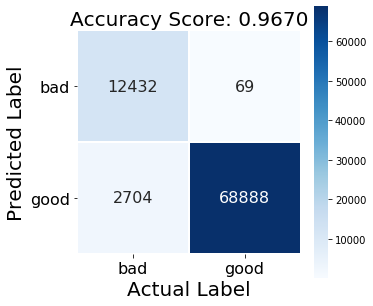

In [37]:
# Multinomial Naive Bayesian with TF-IDF

# Train the model
mnb_tfidf=MultinomialNB()
mnb_tfidf.fit(tfidf_X,labels)





# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf=mnb_tfidf.score(test_tfidf_X,test_labels)
predictions_mnb_tfidf=mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf=confusion_matrix(test_labels,predictions_mnb_tfidf)
creport_mnb_tfidf=classification_report(test_labels,predictions_mnb_tfidf)



# (Keep the following lines)
print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)